<a href="https://colab.research.google.com/github/riya-rc/Resume-Screener/blob/master/group_13_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESUME SCREENING USING NATURAL LANGUAGE PROCESSING**


---

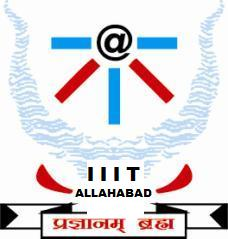



Group Members:- 
*   Meghna (IIT2018109)
*   Aaditya Gadhave (IIT2018144)
*   Riya Chaudhary (IIT2018145)
*   Vidhi Sah (IIT2018169)

##REFERENCES 

RESEARCH PAPER REFERENCE -

[1]https://www.researchgate.net/publication/347633082_AN_AUTOMATED_RESUME_SCREENING_SYSTEM_USING_NATURAL_LANGUAGE_PROCESSING_AND_SIMILARITY




---

CODE REFERENCE - 



[1]https://github.com/skybluee2001/Resume-Screener/blob/main/Resume_Screener.ipynb



---


BLOG LINK -


[1]https://medium.com/@iit2018144/automated-resume-screener-b0a66d0614c1 





#Why resume screening?
For every placement and hiring process, resumes play a very important aspect for each candidate applying for any company. Resumes are key for a company to know the skill set and value of each candidate. According to the requirements of the job, the company screens the resume, and if the skill set matches, they are called for a further interview process. Companies get a lot of resumes every day and going through them and finding the best fit candidate for the job can be a very tedious process. The manual resume screening process is prone to human bias and errors. Hence, the automation of this process can lead to more efficiency and exponential growth of the company.

#What do we propose?
Therefore to ease things out, we propose to create a Resume Screener model that will automate the screening required for a company. Providing the required skill set and getting the most suitable candidates from the model is our main motive in the project. We aim to provide an easy-to-use platform to help solve this problem faced by the recruiters. `

#How will it work?
It will use the power of NLP (Natural Language Processing) and pattern matching techniques to extract useful information from the candidates. We can apply multiple filters based on job titles, skills required, and years of experience required from the candidates.


##**CODE IMPLEMETATION**

### DATASET PREPROCESSING AND VISUALISATION

####**Fetching the dataset online** :- 

We have downloaded publically available dataset from kaggle

https://www.kaggle.com/gauravduttakiit/resume-dataset

The dataset is a csv file that contains 962 rows(each contains a unique resume data) and 2 columns(attribues are category and resume details)


In [ ]:
# Getting the dataset from the shared google drive
link = "https://drive.google.com/file/d/1TSFeX_heBC6-_qosPufpIFP5xKQZ61CW/view?usp=sharing"
file_id = link.split("/")[-2] 
!gdown --id $file_id

Downloading...
From: https://drive.google.com/uc?id=1TSFeX_heBC6-_qosPufpIFP5xKQZ61CW
To: /content/UpdatedResumeDataSet.csv
100% 3.06M/3.06M [00:00<00:00, 14.3MB/s]


####Importing the required libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
warnings.filterwarnings('ignore')

####Exploring the dataset

Now lets read the dataset from the csv file and print some of the rows to explore the dataset
A new column 'cleaned_resume' is created which will store the cleaned resume after some modifications in later part of the code 

In [ ]:
resumeDataSet = pd.read_csv('/content/UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''

shuffledDataset = resumeDataSet
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


####Display the categories of the resumes 

Now, we will display all the categories of the resumes available in the dataset given. 

We can observe that currently there are 25 unique categories of resumes available currently.


In [ ]:
print ("Displaying the distinct categories of all the resumes: \n")

categories = resumeDataSet['Category'].unique()
Categories = resumeDataSet['Category'].unique()

for category in categories :
    print(category)

Displaying the distinct categories of all the resumes: 

Data Science
HR
Advocate
Arts
Web Designing
Mechanical Engineer
Sales
Health and fitness
Civil Engineer
Java Developer
Business Analyst
SAP Developer
Automation Testing
Electrical Engineering
Operations Manager
Python Developer
DevOps Engineer
Network Security Engineer
PMO
Database
Hadoop
ETL Developer
DotNet Developer
Blockchain
Testing


####Display the number of resumes available in each category

Now, lets see the distinct categories of resume and the number of records belonging to each category

In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category: \n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category: 

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Data Science                 40
Operations Manager           40
Sales                        40
Mechanical Engineer          40
ETL Developer                40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


####Analysing the Resume Dataset graphically

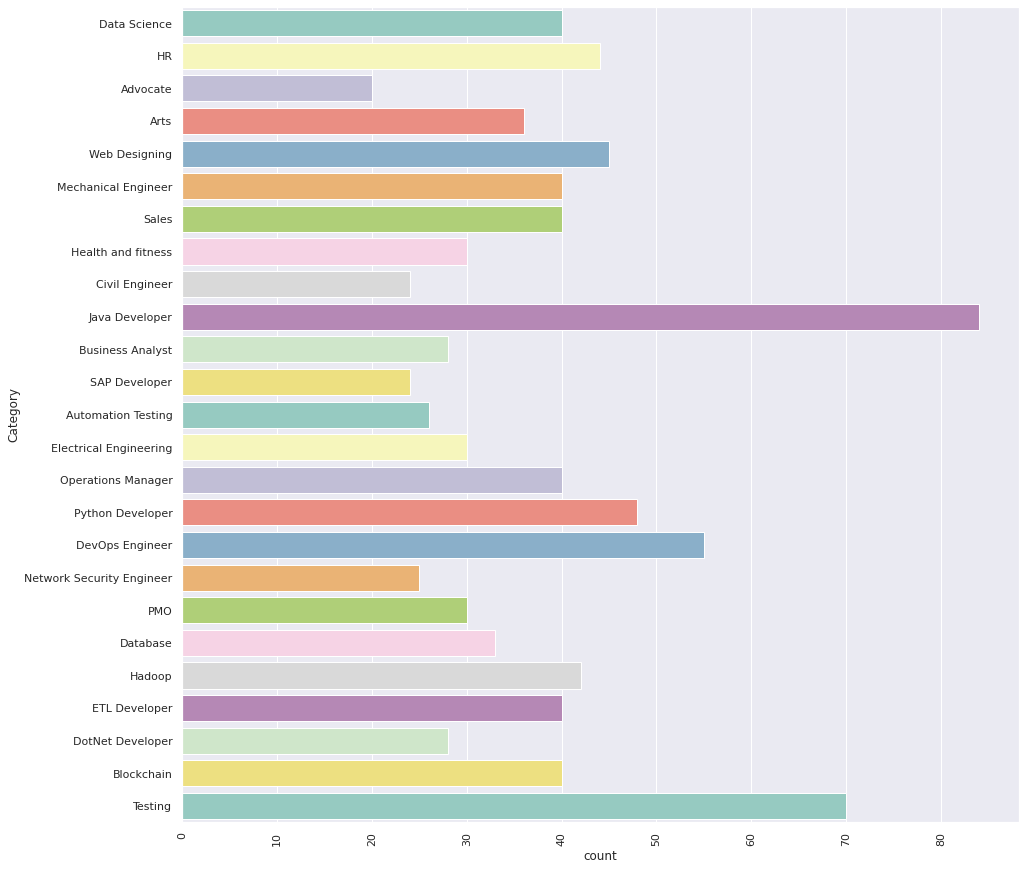

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet, palette="Set3")
plt.show()

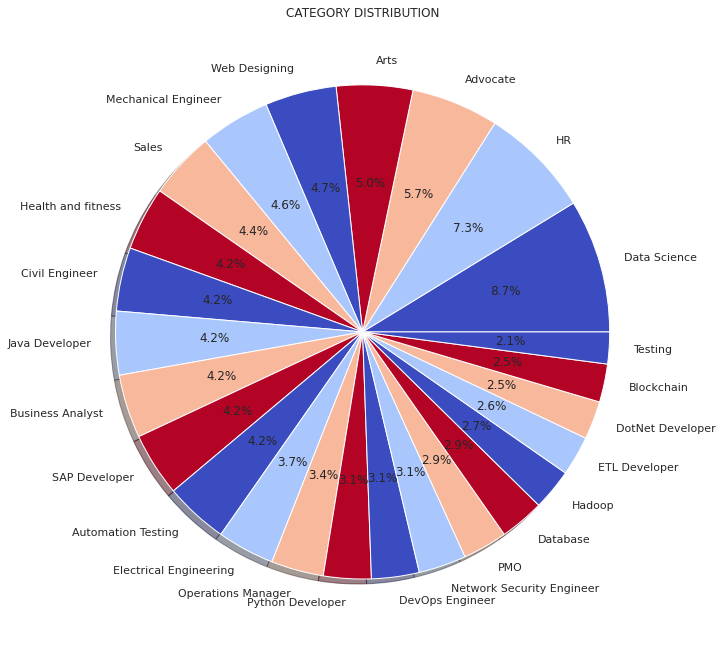

In [ ]:
from matplotlib.gridspec import GridSpec

targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()

plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

####Dataset Preprocessing and cleaning

In [ ]:
import re
#cleaning of the data using regex library
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))



#### Tokenization
Tokenization is process of breaking large data into smaller units. Tokenization is basically breaking up various sentance, paragraph,etc into smaller pieces like words, terms,etc. These smaller units/pieces are called as tokens. The main use of Tokenization is to identify the word or term that constitute a string of characters. Through analyzing these tokens, we can extract the meaing of the text, helping in better processing. This is  important as through these words, we  will  be  able  to  derive  meaning  from  the  original  text  sequence.[1]

#### StopWords
StopWords are those words which don't add up any value to the existing text. Thus removal of such will not cause any loss of meaning in data. Words like - is, are, the, a, an, etc. are StopWords. Removal of these words helps to work upon other important words. Removing stopwords also reduces the size of data, thus more efficient Content Extraction. 

Here, we are removing all the unwanted words from the resume, which doesn't contribute much to the quality of the resume.

In [ ]:
#importing the libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk.stem.porter import *


#cleaning of the sentences
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""

stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(nltk.wordnet.WordNetLemmatizer().lemmatize(text, pos='v'))


for i in range(0,len(Sentences)):
    cleanedText = cleanResume(Sentences[i])
    requiredWords = nltk.word_tokenize(cleanedText)
    lemmatizedText = [] 
    for word in requiredWords:
      if word not in oneSetOfStopWords and word not in string.punctuation:
        ls = lemmatize_stemming(word)
        totalWords.append(ls)
        lemmatizedText.append(ls)
    lemmatized = ' '.join([str(elem) for elem in lemmatizedText])
    resumeDataSet['cleaned_resume'][i] = lemmatized
    cleanedSentences += lemmatized
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[('project', 4076), ('exprienc', 3829), ('manag', 3655), ('compani', 3639), ('develop', 3560), ('month', 3344), ('detail', 3237), ('descript', 3130), ('test', 2687), ('work', 2387), ('team', 2159), ('data', 2156), ('1', 2134), ('skill', 2086), ('system', 1954), ('use', 1884), ('engin', 1856), ('requir', 1698), ('respons', 1649), ('report', 1628), ('databas', 1533), ('6', 1499), ('year', 1499), ('client', 1472), ('design', 1465), ('maharashtra', 1449), ('oper', 1432), ('process', 1408), ('applic', 1406), ('servic', 1396), ('technolog', 1390), ('custom', 1341), ('busi', 1278), ('server', 1196), ('ltd', 1177), ('less', 1145), ('sql', 1120), ('januari

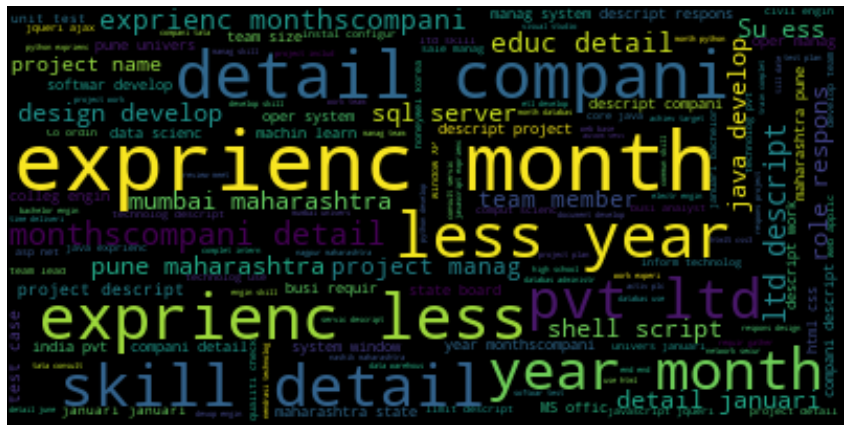

In [ ]:
#Visualising the data according to it's frequency of occurence/importance in all the resumes
wc = WordCloud(background_color='black').generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

###MODEL TRAINING AND TESTING

####Encoding the category column using labelEncoding such that it can be used for multiclass classification

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])


#It shows the job categories in encoding
print(le.classes_)


['Advocate' 'Arts' 'Automation Testing' 'Blockchain' 'Business Analyst'
 'Civil Engineer' 'Data Science' 'Database' 'DevOps Engineer'
 'DotNet Developer' 'ETL Developer' 'Electrical Engineering' 'HR' 'Hadoop'
 'Health and fitness' 'Java Developer' 'Mechanical Engineer'
 'Network Security Engineer' 'Operations Manager' 'PMO' 'Python Developer'
 'SAP Developer' 'Sales' 'Testing' 'Web Designing']


####Preprocessing the cleanedResume column and convert it into vectors using Tf-idf method.

TF-IDF  stands  for  “Term  Frequency  –  Inverse  Document  Frequency” .It was invented for information retrieval and  document search. This weight is a numerical measure to determine how important a term  is  with  respect  to  a  document  in  a  collection  or  corpus.  

**Term  Frequency** measures how  frequently  a word  occurs  in each document in the corpus.

**Inverse Document Frequency** measures how important a word is for all documents in the corpus.[1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

#vectorizing the cleaned_resume column using Tf-idf method
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print('Word Vectorization is completed!')




Word Vectorization is completed!


####Train-test split

Using 80% data for training and 20% data for testing.

In [ ]:
#Splitting the test and train data 
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=1, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


####MODEL BUILDING AND TRAINING

OneVsRest Classifier is used with KNeighboursClassifier to build the multiclass classification model.

In [ ]:
#Training the model on train dataset
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

####MODEL PREDICTION AND TESTING

We can see that the prediction comes out the same for the training and the testing model. Therefore, there isn't a case of data over-fitting. Also, the accuracy comes out to be 99% for the job category prediction according to the resume, which can save a lot of manual work and bring efficiency to the system.

In [ ]:
prediction = clf.predict(X_test)
#Prediction Accuracy
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.96


**Classification Report for the defined classifier**

We can observe a lot of things from the classifier:


1.   0,1,2,3... are the job categories like advocate,civil engineer, etc.
2.   It shows category wise precision, recall and f1-score of all the job categories predictions.

Discussing some definitions in detail:



1.  **Precision** : Precision can be seen as a measure of a classifier’s exactness. Precision is equal to the number of true positives divide by the total number of true positives and false positives.
    *   Precision = TruePositives/(TruePositives + FalsePositives)


2. **Recall** : Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. Recall is calculated as the number of true positives divided by the total number of true positives and false negatives.
    *   Recall = TruePositives / (TruePositives + FalseNegatives)

3. **F1-Score** :The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. It takes both false positive and false negatives into account. Therefore, it performs well on an imbalanced dataset.

    *   F1-Score : ( 2X(Precision*Recall) ) / (Precision + Recall)

4. **Support** : Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.







In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       0.88      0.78      0.82         9
           7       1.00      0.80      0.89         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      0.25      0.40         4
          15       1.00      1.00      1.

###USING TF-IDF WITH COSINE SIMILARITY TO FIND THE CATEGORY OF THE RESUME

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.utils import shuffle

shuffledDataset = pd.read_csv('/content/UpdatedResumeDataSet.csv' ,encoding='utf-8')


shuffledDataset['cleaned_resume'] = resumeDataSet['cleaned_resume'] 
requiredText = shuffledDataset['cleaned_resume'].values
uniqueCategories = len(Categories)
requiredTextCategorical = []
for i in range(0,uniqueCategories):
  requiredTextCategorical.append("")

for i in range(0,len(requiredText)):
  for j in range(0,len(Categories)):
    if(((str)(shuffledDataset['Category'][i])) == Categories[j]):
      requiredTextCategorical[j] += requiredText[i]


#vectorizing the cleaned_resume column using Tf-idf method
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

#making vectors of categories
category_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
category_vectorizer.fit(requiredTextCategorical)
categoryFeatures = category_vectorizer.transform(requiredTextCategorical)

Splitting Training and Testing Data as 80% and 20% respectively using the shufffled dataset 

In [ ]:
division = (int)(len(shuffledDataset)*0.8)
x_train = []
x_test = []
y_train = []
y_test = []
  
train_categories = categoryFeatures
x_train = WordFeatures[:division]
x_test = WordFeatures[division:]
y_train = shuffledDataset['Category'].values[:division]
y_test = shuffledDataset['Category'].values[division:]

**Cosine Similarity :**

Cosine similarity is a metric used to determine how similar the documents are irrespective of their size.

Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. In this context, the two vectors I am talking about are arrays containing the word counts of two documents.


Predicting using cosine similarity.
Here we are matching the tdidf vector of each of cleaned resumes of is matched with other tdidf vectors of other resumes.

The category of resume with highest cosine similarity value is used as the predicted value.

Predicting for Train Dataset

In [ ]:
predicted_train = []
for data in x_train:
  cosine_similarities = linear_kernel(data,train_categories).flatten()
  predict = cosine_similarities.argsort()[-1]

  predicted_train.append(Categories[predict])

Predicting for Test Dataset

In [ ]:
predicted_test = []
for data in x_test:
  cosine_similarities = linear_kernel(data,train_categories).flatten()
  predict = cosine_similarities.argsort()[-1]

  predicted_test.append(Categories[predict])

**Metrics Report for the method**

We can observe a lot of things from the metric:

Discussing some definitions in detail:



1.  **Precision** : Precision can be seen as a measure of a classifier’s exactness. Precision is equal to the number of true positives divide by the total number of true positives and false positives.
    *   Precision = TruePositives/(TruePositives + FalsePositives)


2. **Recall** : Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. Recall is calculated as the number of true positives divided by the total number of true positives and false negatives.
    *   Recall = TruePositives / (TruePositives + FalseNegatives)

3. **F1-Score** :The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. It takes both false positive and false negatives into account. Therefore, it performs well on an imbalanced dataset.

    *   F1-Score : ( 2X(Precision*Recall) ) / (Precision + Recall)

4. **Support** : Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [ ]:
print("Metrics for train dataset")
print(metrics.classification_report(y_train, predicted_train))
print("Metrics for test dataset")
print(metrics.classification_report(y_test,predicted_test))

Metrics for train dataset
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        20
                     Arts       1.00      0.83      0.91        36
       Automation Testing       0.96      0.92      0.94        26
         Business Analyst       0.70      1.00      0.82        28
           Civil Engineer       1.00      0.67      0.80        24
             Data Science       0.76      0.80      0.78        40
                 Database       1.00      1.00      1.00        33
          DevOps Engineer       0.79      0.96      0.87        55
   Electrical Engineering       1.00      0.60      0.75        30
                       HR       0.88      0.64      0.74        44
                   Hadoop       1.00      0.85      0.92        27
       Health and fitness       1.00      0.83      0.91        30
           Java Developer       1.00      0.86      0.92        84
      Mechanical Engineer       1.0

We can see that the prediction comes out the with a little difference between the training and the testing model. Therefore, there isn't a case of data over-fitting. Also, the accuracy comes out to be 79% for the job category prediction according to the resume, which can save a lot of manual work and bring efficiency to the system.